# Data Visualization with Python

The following notebook serves as an introduction to data visualization with Python for the course "Data Mining".

For any comments or suggestions you can contact charlotte[dot]laclau[at]univ-grenoble-alpes[dot]fr or parantapa[dot]goswami[at]viseo[dot]com


## Introduction - Why Data Visualization?

Data visualization (DataViz) is an essential tool for exploring and and find insight in the data. Before jumping to complex machine learning or multivariate models, one should always take a first look at the data through simple visualization techniques. Indeed, visualization provides a unique perspective on the dataset that might in some cases allow you to detect potential challenge or specifities in your data that should be taken into account for future and in depth analysis. 

Data can be visualized in lots of different ways depending on the nature of the features of the data (continuous, discrete or categorical). Also, levels of visualization depends on the number of dimensions that is needed to  be represented: univariate (1D), bivariate (2D) or multivariate (ND).


## Objective of the session

The goal of this session is to discover how to make 1D, 2D, 3D and eventually multidimensional data visualization with Python. We will see different methods, which can help you in real life to choose an appropriate visualization best suited for the data at hand.

We will explore three different librairies: 
* **Matplotlib** (very similar to Matlab's syntax): Classic Python library for data visualization.
* **Pandas**: Its main purpose is to handle data frames. It also provides basic visualization modules.
* **Seaborn**: It provides a high-level interface to draw statistical graphics. 

## Basics: Import Libraries

In [1]:
# Import all three librairies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# For displaying the plots inside Notebook
%matplotlib inline 

**Note**: Both pandas visulisation modules and seaborn are based on matlotlib, therefore a lot of command related to the customization of plot can be found in tutorials on matplotlib. 

## Pima Indian Diabetes dataset 

### Description of the data 
The [Pima Indian Diabetes Dataset](https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes) consists of 768 females, who are at least 21 years old, of Pima Indian heritage. They are described by following 8 features which take numerical values, and the class: 
1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable: 0 or 1

### Import the data

In [2]:
# We start by importing the data using pandas
# Hint: use "read_csv" method, Note that comma (",") is the field separator, and we have no "header"
df = pd.read_csv('pima.txt', sep=",", header=None) 

# We name the columns based on above features
df.columns = ["Pregnancy","Glucose","BloodPress", "Fold", "Insulin","BodyMass",'Diabetes','Age','Class']

# We sneak peek into the data
# Hint: use dataframe "head" method with "n" parameter
df.head(n=5) 

,Pregnancy,Glucose,BloodPress,Fold,Insulin,BodyMass,Diabetes,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Question: for each of the 8 features and the class, define their nature

* **Continuous**: 
* **Discrete**: 
* **Categorical**: 

## Visualizing 1D Data

1D plots are a good way to detect outliers, level of variability in the features etc.

Here is a non-exhaustive list of possible methods:

* **For continuous features**: Box Plot, Histogram, Density Representation
* **For discrete features**: Bar Chart, Dot Chart
* **For categorical features**: Pie Chart is most common. There exist a lot of newer representations, but in the end they all provide the exact same information.


### Visualizing continuous features

#### Box Plot
The Box Plot is an interesting tool for data visualisation as it contains multiple statistics informations about the feature: the minimum and maximum values, the first and third quartiles (bottom and top line of the box),the median value (middle line in the box) and the range (dispersion).

We will use "BodyMass" as the example here.

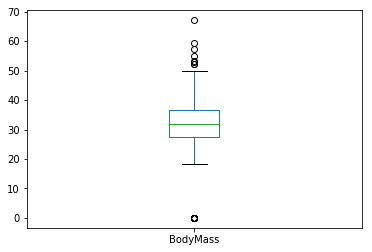

In [3]:
# Write code to draw a Box Plot of "BadyMass" feature
# Hint 1: use "DataFrame.boxplot" from pandas on the dataframe df
# Hint 2: choose the column properly
# Hint 3: you can control "grid" parameter as True or False
df.boxplot(column = 'BodyMass', grid=False) 

**Remark**: The box plot highlight the presence of outliers (circles on the figure). One of the individuals has a BodyMass of 0, which is impossible. In this case, 0 is the code for missing values.

#### Histogram
The histogram groups data into intervals and is good to look at the distribution of the values.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10bccac50>]], dtype=object)

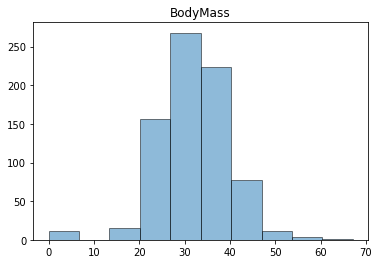

In [4]:
# Write code to draw a Histogram of "BadyMass" feature
# Hint 1: use "DataFrame.hist" from pandas on the dataframe df
# Hint 2: choose the column properly
# Hint 3: you can control "grid" parameter as True or False
# Hint 4: for this plot choose "bins" as 10, "alpha" as 0.5 and "ec" as "black" 
df.hist(column = 'BodyMass', grid='off', bins=10, alpha=0.5, ec='black') 

**<font color=red>Warning</font>**: The number of bins/intervals that you choose can strongly impact the representation. To check it, change the value in the option bins to 3 for instance.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10f5dc7f0>]], dtype=object)

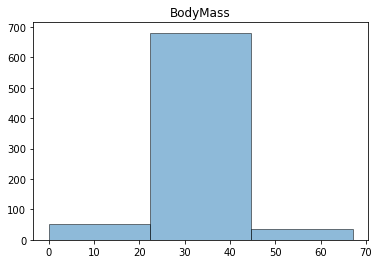

In [5]:
# Write code to draw a histogram for "BodyMass" feature with 3 bins
df.hist(column = 'BodyMass', grid='off', bins=3, alpha=0.5, ec='black') 

#### Density Plot
The Density Plot gives interesting informations w.r.t. the type of probability distribution that you can assume for the feature.

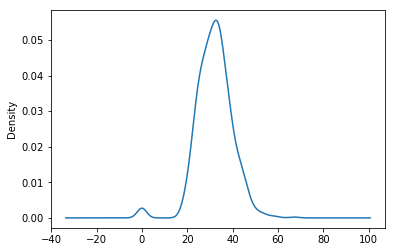

In [6]:
# Write code to draw a Density Plot of "BadyMass" feature
# Hint: use "DataFrame.plot.density" from pandas on the dataframe df
df['BodyMass'].plot.density() 

#### Question: Draw box plots of "BodyMass" and "Glucose" together. Why is the visualization is misleading?

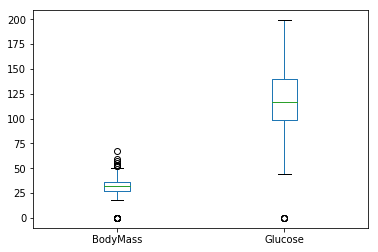

In [7]:
# Write code to draw Box Plot for "BodyMass" and "Glucose" together
# Hint: you can pass a list of features for "column" parameter
df.boxplot(column = ['BodyMass','Glucose'], grid='off') 

#### Question: Draw density plot for all continuous features. Why this visualization do not have above problem?

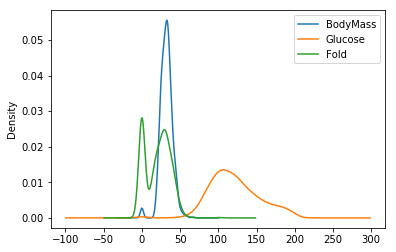

In [8]:
# Write code to draw Density Plot for all 4 continuous features together
# Hint: you can filter dataframe by a list of columns and then use plot.density
df[['BodyMass','Glucose','Fold']].plot.density() 

#### Subplots

For the box plot and histogram, to visualize each feature in its own scale, it is better to draw one plot per feature. All these plots can be arranged in a grid.

**Task**: See the usage of `plt.subplot()`. Then draw:
1. One figure containing box plots of all 4 continuous features 
2. One figure containing histograms of all 4 continuous features 

Note: You can also play with basic customization for each figure (labeling, title, colors etc.)

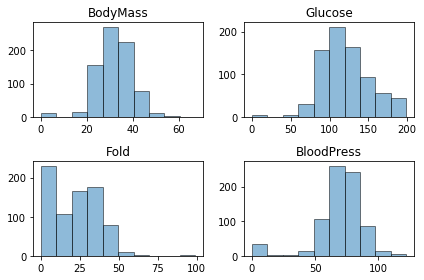

In [9]:
# Write code to create subplots to vizualize four continous features
# Hint: use plt.pyplot() in a 2 by 2 grid. You can adjust these using "nrows" and "ncols"
fig,axes = plt.subplots(nrows = 2,ncols = 2) # TO DELETE
df.hist('BodyMass', bins=10, grid='off', alpha=0.5, ec='black', ax = axes[0, 0]) 
df.hist('Glucose', bins=10, grid='off', alpha=0.5, ec='black', ax = axes[0, 1]) 
df.hist('Fold', bins=10, grid='off', alpha=0.5, ec='black', ax = axes[1, 0]) 
df.hist('BloodPress', bins=10, grid='off', alpha=0.5, ec='black', ax = axes[1, 1]) 

# For a neat display of plots
plt.tight_layout()

### Visualizing discrete features

**Bar Chart** or **Bar Graph** presents discrete data with rectangular bars with heights proportional to the values that they represent.

In this exerise, we will visualize "Pregnancy" feature.

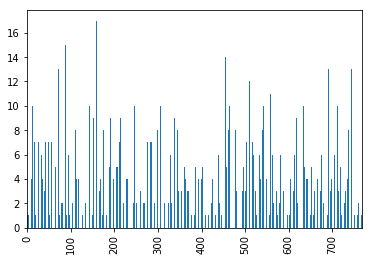

In [10]:
# Write code to create a Bar Chart of the "Pregnancy" feature.
df.Pregnancy.plot.bar() # TO DELETE

# For a neat display of plots: plating with the X-tick labels
_ = plt.xticks(list(df.index)[::100], list(df.index)[::100])

Let us now get some other information from the "Pregnancy" feature. We will now visualize the distribution of number of females for different "Pregnancy" values.  For that:
1. First count the number of samples for each possible "Pregnancy" value (hint: `DataFrame.value_counts()`)
2. Plot the distribution using Bar Chart

In [11]:
# Step 1: Write code to generate the count distrubution
df["Pregnancy"].value_counts() 

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancy, dtype: int64

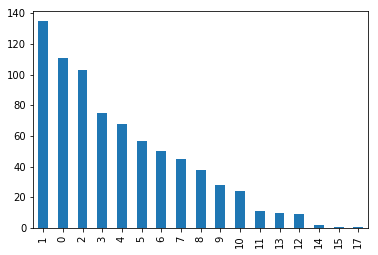

In [12]:
# Step 2: Write code to create Bar Chart for the count distrubution
df["Pregnancy"].value_counts().plot.bar()

### Visualizing categorical features

Most common way to visualize the distribution of categorical feature is **Pie Chart**. It is a circular statistical graphic which is divided into slices to illustrate numerical proportion of different posible values of the categorical feature. The arc length of each slice is proportional to the quantity it represents.

As we are visualizing the count distribution, the first step is to use `DataFrame.value_counts()`

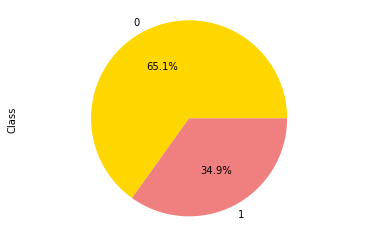

In [13]:
# Write code to create a Pie Chart of the "Class" feature.
# Hint 1: plot the count distrubution, NOT the data itself
# Hint 2: use plot.pie() on the count distrubution
# Hint 3: use autopct="%1.1f%%" to display percentage values and following colors
colors = ['gold', 'lightcoral']
df['Class'].value_counts().plot.pie(autopct='%1.1f%%', colors=colors)              

# For a neat display of the plot
_ = plt.axis('equal')

**Remark**: Pie charts are very effective to visualize distribution of classes on the training data. It helps to discover if there exist a stong imbalance of classes in the data.

**<font color=red>Warning</font>**: Pie charts cannot show more than a few values as the slices become too small. This makes them unsuitable for use with categorical features with a larger number of possible values.

## Visualizing 2D Data

2D plots (or in multi-D plots in general) are important to detect potential dependencies in the data (colinearity, linearity etc.).

Again, the nature of the features will guide you to choose the good representation.
* **1 continuous vs. 1 continuous**: Scatter Plot, Pair Plot 
* **1 continous vs. 1 categorical**: Box Plot (yes again!), Violin Plot (very similar to boxplot)
* **1 categorical vs. 1 categorical**: Heatmap (to visualize counts per category or mean per category)

### Visualizing continuous vs. continuous features

#### Scatter Plot
Scatter Plot is used to display values for *typically two variables* for a set of data on Cartesian coordinates. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. A scatter plot can suggest various kinds of correlations between features.

Let's use "BodyMass" and "Fold" features together.

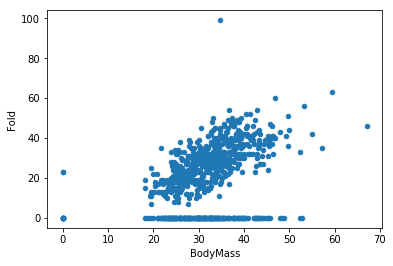

In [14]:
# Write code to create Scatter Plot between "BodyMass" and "Fold" features
# Hint: use "DataFrame.plot.scatter()" on our dataframe df, and mention the "x" and "y" axis features
df.plot.scatter(x="BodyMass", y="Fold") 

**Questions**:
1. Can you detect values?
2. Can you visualize any correlation between "BodyMass" and "Fold?

**Remark**: Pandas `plot` module is very useful for basic visualization techniques ([more details here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html)).

Now we will use explore **seaborn** library to create more advanced visualizations.

First, we will see seaborn **`jointplot()`**. It shows bivariate scatter plots and univariate histograms in the same figure.

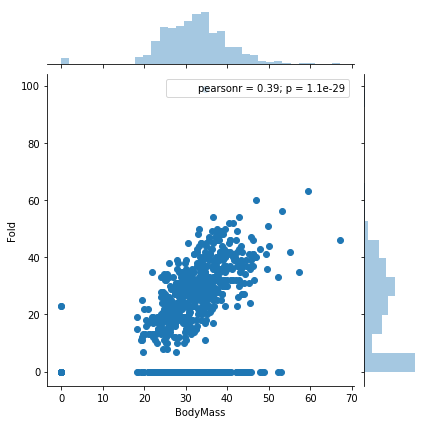

In [15]:
# Write code to create a jointplot using "BodyMass" and "Fold" features
# Hint 1: mention the "x" and "y" axis features, and out dataframe df as "data"
# Hint 2: "size" parameter controls the size of the plot. Here try size=6
sns.jointplot(x="BodyMass", y="Fold", data=df, size=6) 

**Note**: The legend refers to a correlation test (Pearson $\rho$) which indicate a significant correlation between these features (p-value below .05).

**Question**: Does the Pearson $\rho$ calculated correspond to your interpretation of correlation from the previous scatter plot?

#### Pair Plot

Pair Plots are useful for more than 2 continuous variables. It is an extension of scatter plot. It shows the bivariate scatter plots between each pair of features. By doing so, it allows to avoid the use of subplots.

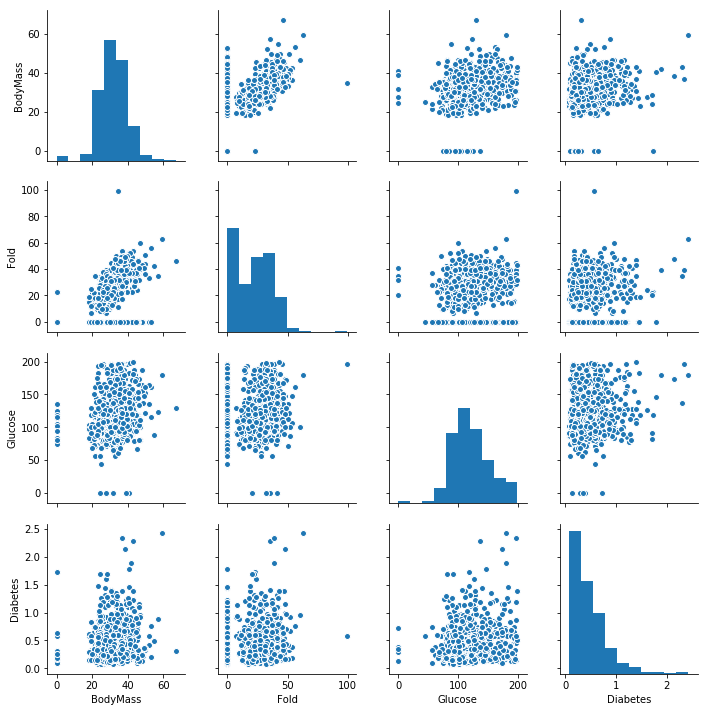

In [16]:
# Write code to create a seaborn pairplot using all 4 continuous features
# Hint 1: use our dataframe df
# Hint 2: give the list of features to "vars" parameters.
# Hint 3: use markers=["o", "s"] and palette="husl" for better display
sns.pairplot(df, vars=["BodyMass","Fold", "Glucose", "Diabetes"])

**Question**: Can you explain the nature of the diagonal plots?

**Note**: It is possible to project the class onto the pair plot (one color for each class) using the option `hue` in the pairplot function.

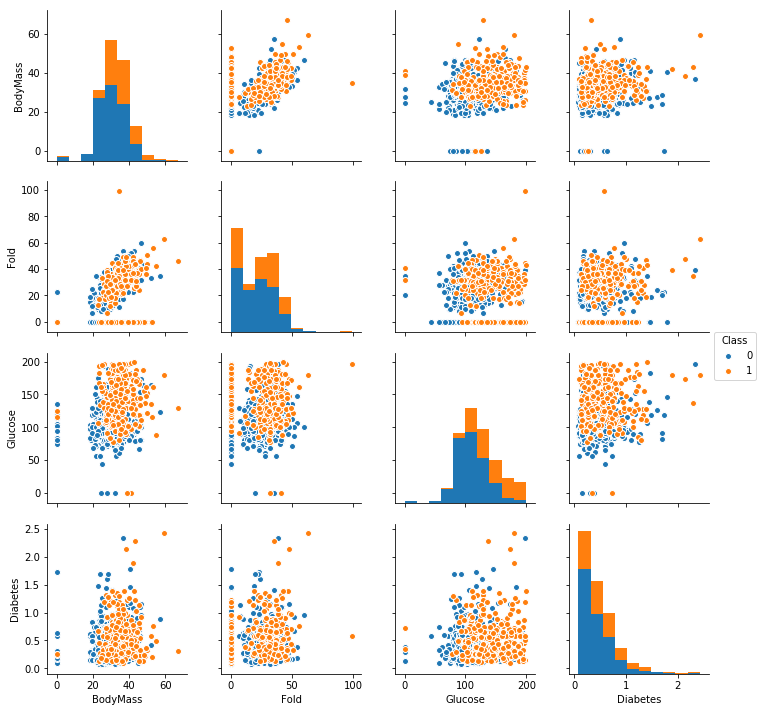

In [17]:
# Write code to create a seaborn pairplot using all 4 continuous features and the "Class"
# Hint: use "hue" option with the "Class" variable
sns.pairplot(df, hue='Class', vars=["BodyMass","Fold", "Glucose", "Diabetes"]) 

### Visualizing continuous vs. categorical (also discrete) features

In order to cross continuous and categorical features, you can again use **box plot**. It allows you to visualize distribution of a continuous variable for each possible value of the categorical variable. One common application is to visualize the output of a clustering algorithm.

Here, we will visualize box plot between continuous "BodyMass" and categorical "Class" features. We will use seaborn `boxplot` module.

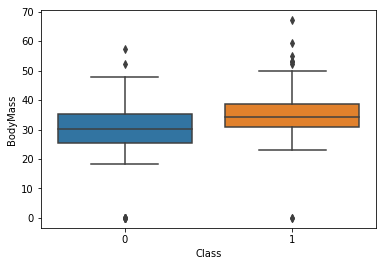

In [18]:
# Write code to create a Box Plot between "BodyMass" and "Class"
# Hint: mention the "x" and "y" axis features, and out dataframe df as "data"
sns.boxplot(x="Class", y="BodyMass", data=df) 

#### Violin Plot

The Violin Plot is similar to box plots, except that they also show the probability density of the data at different values. Like box plots, violin plots also include a marker for the median of the data and a box indicating the interquartile range. Violin plots are used to represent comparison of a variable distribution (or sample distribution) across different categories.

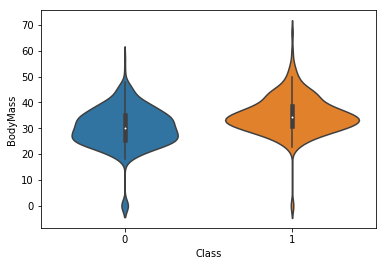

In [19]:
# Write code to create a Violin Plot between "BodyMass" and "Class"
# Hint: mention the "x" and "y" axis features, and out dataframe df as "data"
sns.violinplot(x="Class", y="BodyMass", data=df) 

### Advanced: Visualizing two categorical (also discrete) features

#### Heat Map
A Heat Map is a two-dimensional representation of data in which values are represented by colors. A simple heat map provides an immediate visual summary of information.

In this exercise, we will use "Pregnancy" and "Class" features:
1. Use only "Pregnancy" and "Class" columns: you may create a new dataframe on which we will work
2. We will use `groupby` to group the new two column dataframe based on both "Pregnancy" and "Class" features
3. On top of that use `size()` function to get the count of every possible pair of values of "Pregnancy" and "Class"
4. Then the new dataframe is reindexed using `reset_index()` with `name="count"` argument to set a name for the count column
5. A dataframe `pivot` table is generated using all three columns in the following order: "Pregnancy", "Class", "count"
6. Finally, this pivot table is used to generate the `seaborn.heatmap`

**Note**: This is an advanced piece of code. So you may require to consult different places before you get this right. Do not hesitate to ask for help.

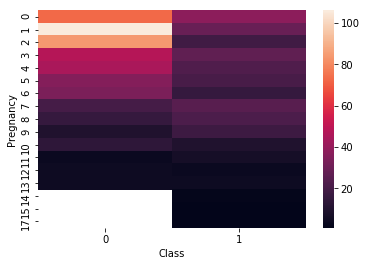

In [20]:
# Write code to create a Heat Map using the above steps
df2 = df[["Pregnancy", "Class"]].groupby(["Pregnancy", "Class"]).size().reset_index(name="count") # TO DELETE
sns.heatmap(df2.pivot("Pregnancy", "Class", "count")) 

## Visualizing 3D Data

3D plots lets you visualize 3 features together. Like, 2D plots, 3D plots are used to analyze potential dependencies in the data (colinearity, linearity etc.).

Here also, based on the nature of the features you can choose the type of visualization. However, in this exercise we will explore to visualize 3 continuous features together. 

In this part, we will use **Axes3D** module from matplotlib library. We will explore 3D scatter plot. For other kinds of 3D plots you can [refer here](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html#mplot3d-tutorial).

### Import Libraries

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# For interactive 3D plots
%matplotlib notebook

### 3D Scatter Plot

You will write code to generate a 3D scatter plot for 3 continuous features namely "BodyMass", "Fold" and "Glucose". **Note** that the created plot is an interactive one. You can rotate the plot to visualize it from different angles. 

<IPython.core.display.Javascript object>


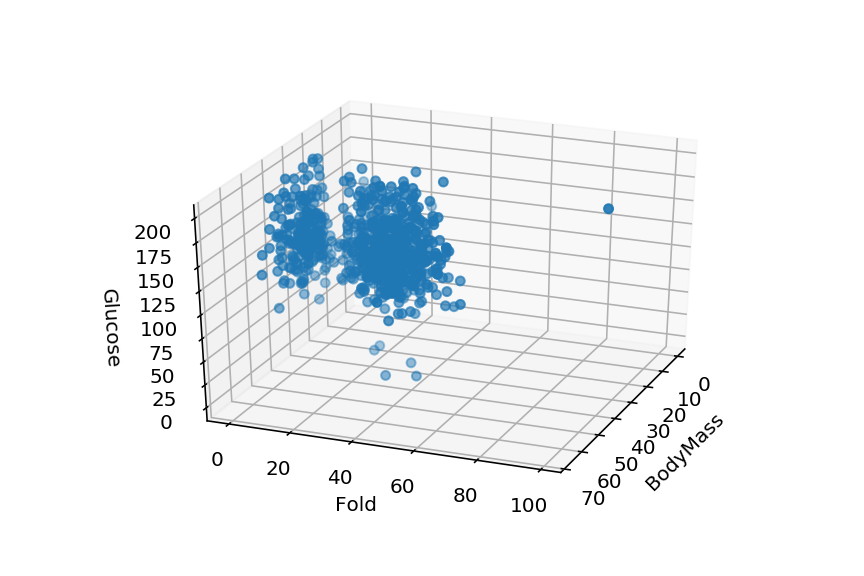

In [28]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Path3DCollection
%matplotlib notebook

# Write code to create a 3D Scatter Plot for "BodyMass", "Fold" and "Glucose" features
# Hint 1: follow the basic steps mentioned in the link above.
# Hint 2: pass three desired columns of our dataframe as "xs", "ys" and "zs" in the scatter plot function
fig_scatter = plt.figure() # TO DELETE
ax = fig_scatter.add_subplot(111, projection='3d') 
ax.scatter(df["BodyMass"], df["Fold"], df["Glucose"])
 
# Write code to display the feature names as axes labels
# Hint: set_xlabel etc. methods to set the labels
ax.set_xlabel("BodyMass") 
ax.set_ylabel("Fold") 
ax.set_zlabel("Glucose") 

## Visualizing Multidimensional Data

For visualizing data with more than 3 features, we have to rely on additional tools. One such tool is **Principal Component Analysis (PCA)**.

PCA uses an orthogonal transformation to convert a set of observations of possibly correlated variables into a set of values of linearly uncorrelated variables called **Principal Components (PC)**. The number of distinct principal components is equal to the smaller of the number of original variables or the number of observations minus one.

We will do PCA to transform our data having 7 numerical features into 2 principal components. We will use [**`sklearn.decomposition.PCA`**](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) package.

In [27]:
# Write code to import libraries
from sklearn.decomposition import PCA # TO DELETE

# We will use following columns of our dataframe:
columns_pca = ["Pregnancy","Glucose","BloodPress", "Fold", "Insulin","BodyMass",'Diabetes','Age']

# Write code to fit a PCA with the dataframe using above columns.
# Hint 1: first create a PCA instance with "n_components=2" 
#       as we are atttempting to generate 2 principal components.
# Hint 2: fit_transform PCA with the required dataframe 

pca2 = PCA(n_components = 2) 
array2PC = pca2.fit_transform(df[columns_pca])

As you can discover from PCA documention (link above), PCA returns principal components as a numpy array. For the ease of plotting with seaborn, we will create a pandas DataFrame from the principal components.

1. use `pandas.DataFrame()` to convert numpy array
2. mark the columns as "PC1" and "PC2"
3. update the dateframe by adding the "Class" column of our original dataframe using `DataFrame.join()`

In [10]:
# Write code to convert array2PC to a DataFrame with columns "PC1" and "PC2"
df2PC = pd.DataFrame(array2PC, columns=["PC1", "PC2"])

# Write code to update df2PC by appending "Class" column from orginal dataframe df
# Hint: using "join" on df2PC
df2PC = df2PC.join(df["Class"]) 

Now, we will create a scatter plot to visualize our 7D data transformed into 2 principal components.

For creating scatter plots using seaborn we will use **`lmplot`** module with `fit_reg=False`.

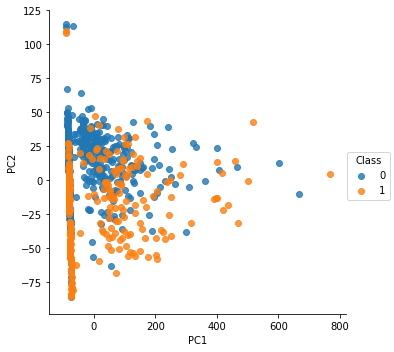

In [11]:
# For displaying the plots inside Notebook
%matplotlib inline

# Write code to create scatter plot for 2 PCs.
# Hint 1; use seaborn.lmplot and set fit_reg=False
# Hint 2: use hue option to visualize the "Class" labels in the plot
sns.lmplot("PC1", "PC2", df2PC, hue="Class", fit_reg=False) 

Now, you have to do PCA on the data as before but for 3 principal components. Then plot 3 principal components in a 3D scatter plot.

**Hint**: The `hue` equivalent for 3D scatter plot is `c`, and you have to pass the entire "Class" column, not just the name.

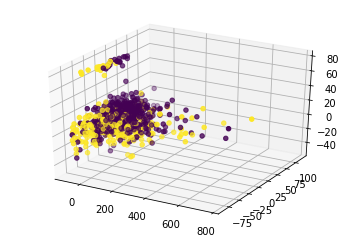

In [12]:
# Write code to do PCA with 3 principal components on the dataframe with columns_pca
pca3 = PCA(n_components = 3) 
array3PC = pca3.fit_transform(df[columns_pca]) 

df3PC = pd.DataFrame(array3PC, columns=["PC1", "PC2", "PC3"]) # TO DELETE
df3PC = df3PC.join(df["Class"]) 

fig_pca = plt.figure() 
ax = fig_pca.add_subplot(111, projection='3d') 
ax.scatter(df3PC["PC1"], df3PC["PC2"], df3PC["PC3"], c=df3PC["Class"]) 